In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Load and attach add-on packages
import h5py
import random
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as mplt
from scipy import stats

MD
p0 ['0.99980', '0.99040', '0.00480']
-----------------
IPS
p0 ['0.99780', '0.99140', '0.00600']
-----------------
FEF
p0 ['0.98900', '0.86440', '0.41160']
-----------------
dACC
p0 ['0.99660', '0.99840', '0.99900']
-----------------
DLPFC
p0 ['0.99980', '1.00000', '0.99380']
-----------------
AI
p0 ['1.00000', '1.00000', '1.00000']
-----------------


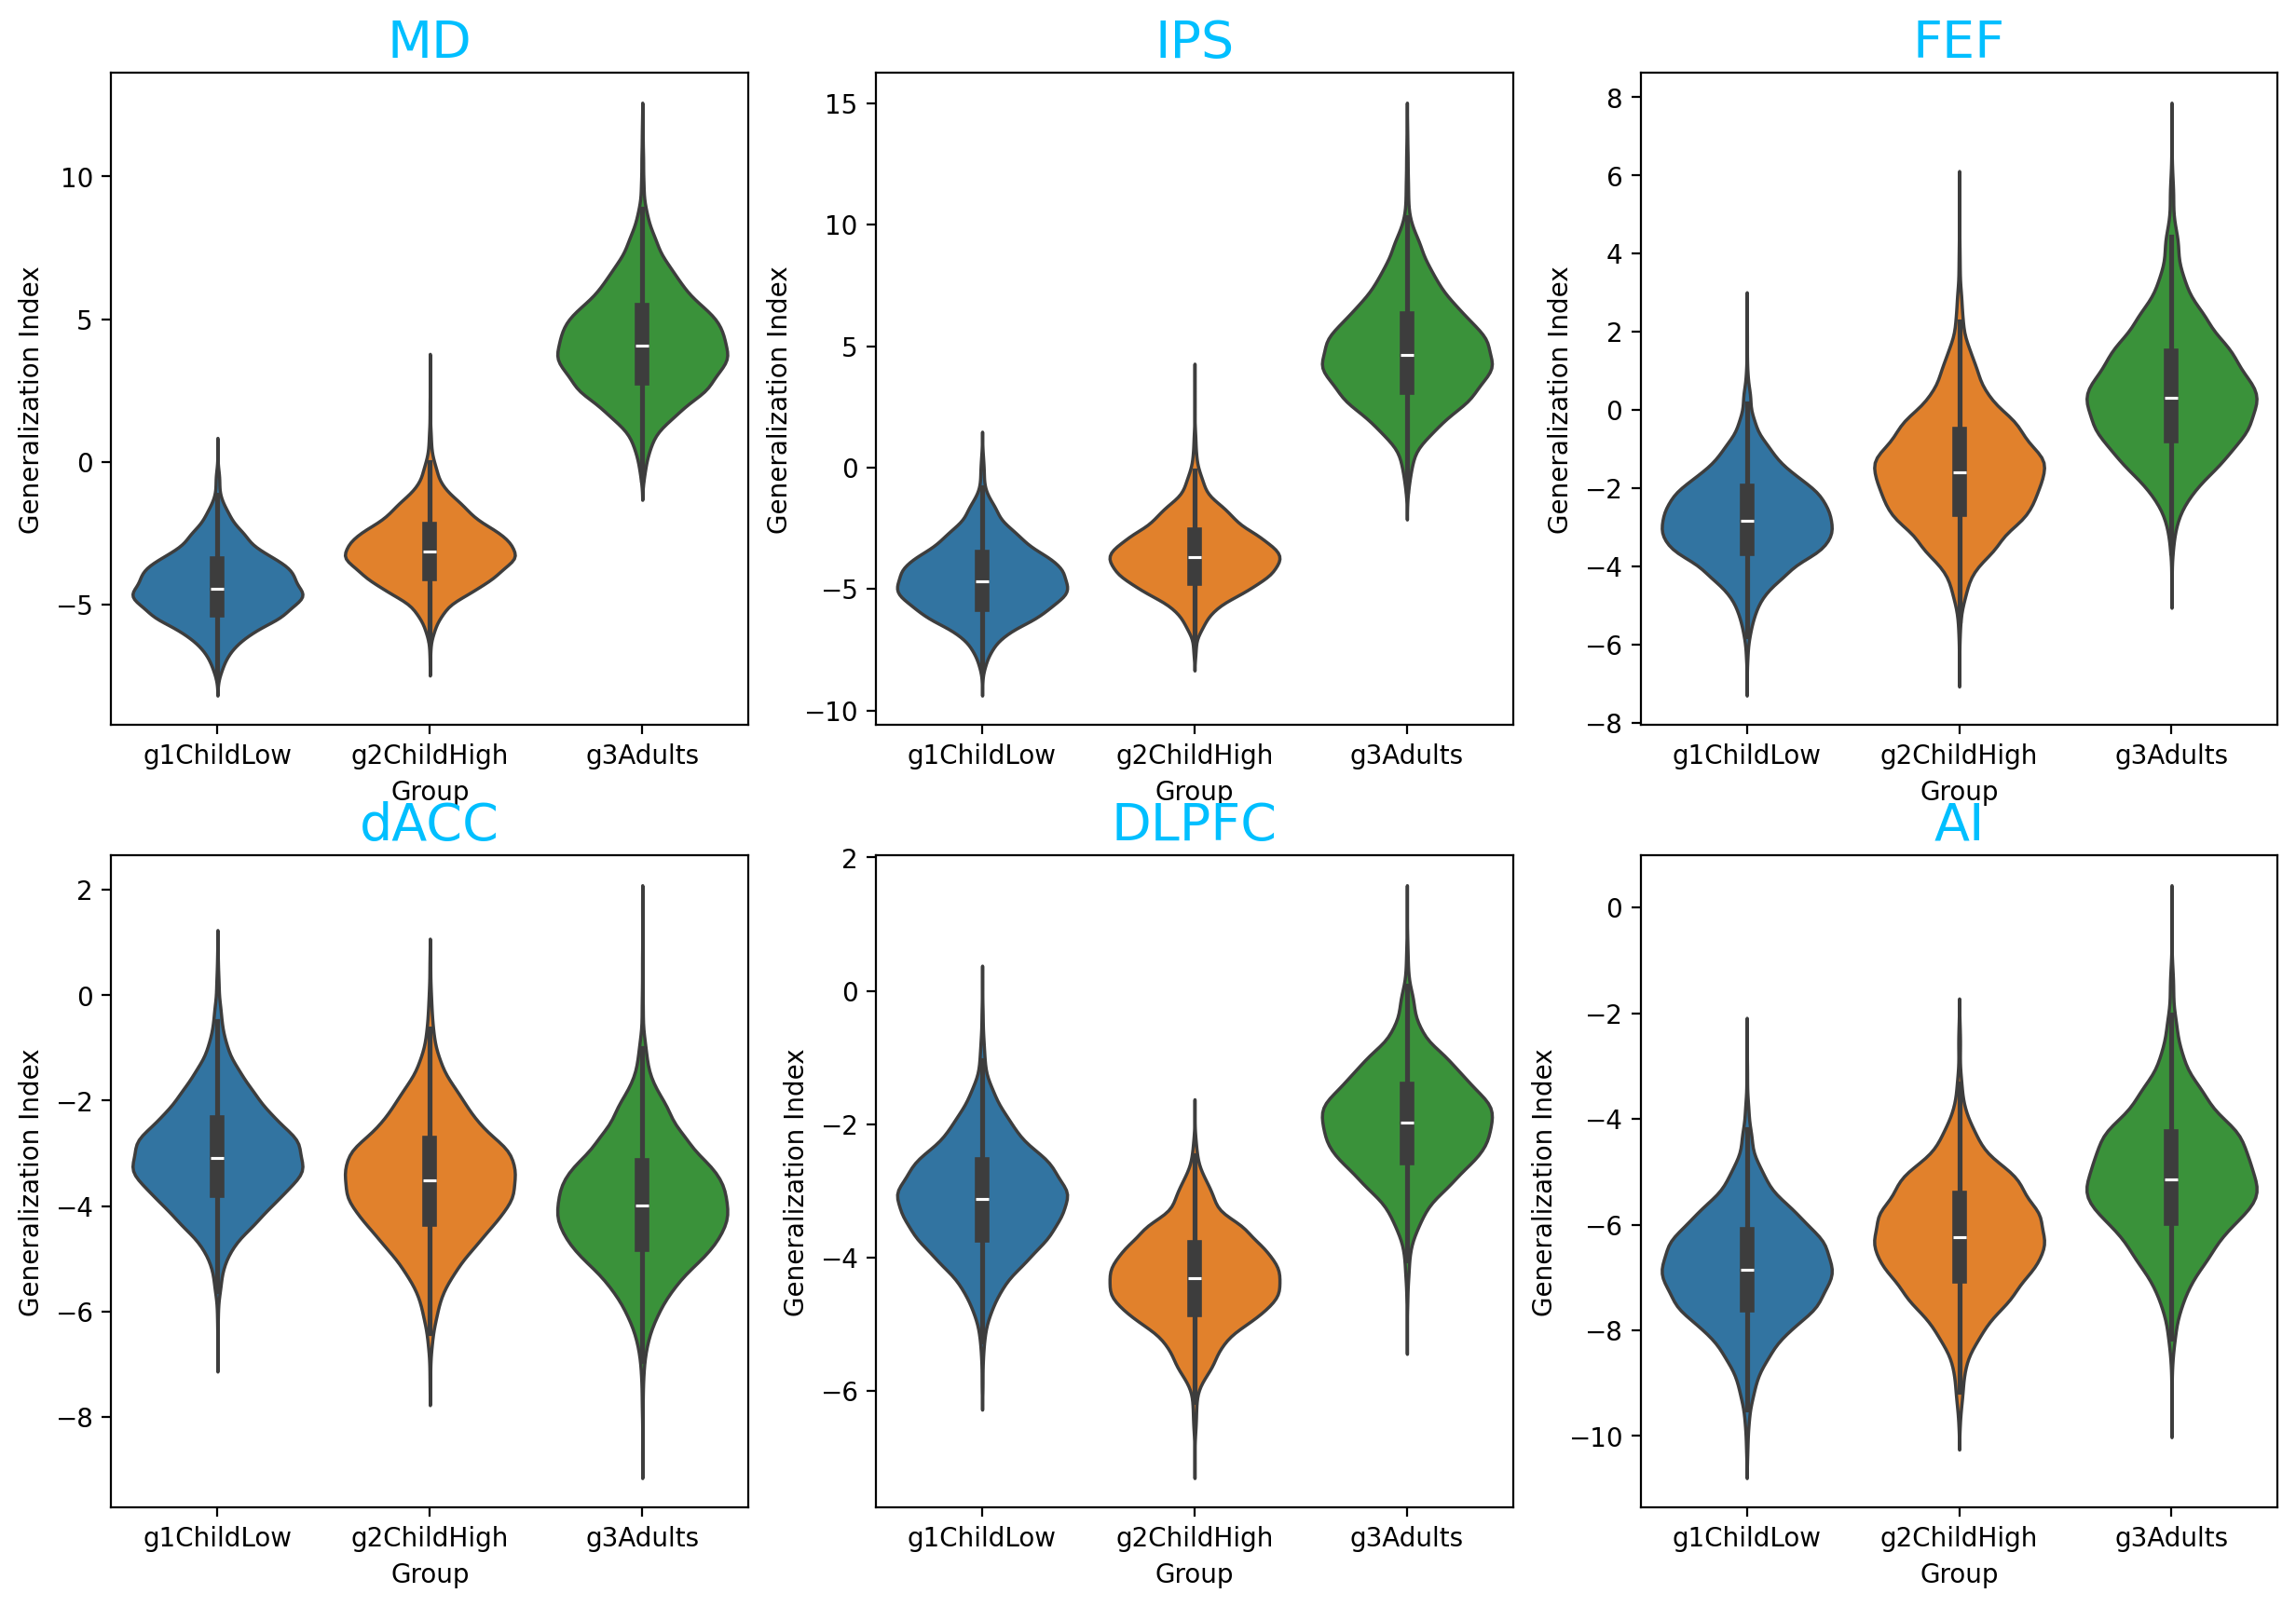

In [2]:
# Calculate the significance of the generalizability index

# Read result file (.mat) of generalizability
read_res = h5py.File('bs_Cond6_CCA_DG_5000.mat')['b'][:]
iter_num = 5000 # Bootstrap samples

# The name of ROIs
rois = ['MD','IPS','FEF','dACC','DLPFC','AI']

# The size of the generated picture
fig_size = (15,10)
fig_set = mplt.figure(figsize=fig_size)

for iroi in range(0,len(rois)):
    # Read data from children in the low age group
    fig_AOC_grp_clow = pd.DataFrame([["g1ChildLow"]*iter_num]).T
    fig_AOC_grp_clow = pd.concat([fig_AOC_grp_clow[0]])
    fig_AOC_y_clow   = pd.DataFrame(read_res[28,iroi,:].T)
    fig_AOC_y_clow   = pd.concat([fig_AOC_y_clow[0]])
    fig_AOC_clow     = pd.concat([fig_AOC_grp_clow,fig_AOC_y_clow], axis=1)
    
    # Read data from children in the high age group
    fig_AOC_grp_chigh = pd.DataFrame([["g2ChildHigh"]*iter_num]).T
    fig_AOC_grp_chigh = pd.concat([fig_AOC_grp_chigh[0]])
    fig_AOC_y_chigh   = pd.DataFrame(read_res[29,iroi,:].T)
    fig_AOC_y_chigh   = pd.concat([fig_AOC_y_chigh[0]])
    fig_AOC_chigh     = pd.concat([fig_AOC_grp_chigh,fig_AOC_y_chigh], axis=1)
    
    # Read data from adults
    fig_AOC_grp   = pd.DataFrame([["g3Adults"]*iter_num]).T
    fig_AOC_grp_a = pd.concat([fig_AOC_grp[0]])
    fig_AOC_y     = pd.DataFrame(read_res[30,iroi,:].T)
    fig_AOC_y_a   = pd.concat([fig_AOC_y[0]])
    fig_AOC_a     = pd.concat([fig_AOC_grp_a,fig_AOC_y_a], axis=1)
    
    # Combine data from each group
    fig_AOC         = pd.concat([fig_AOC_clow, fig_AOC_chigh, fig_AOC_a], axis=0)
    fig_AOC.columns = ["Group","Generalization Index"]
    
    ### Save data to .csv
    #data_name = "./data" + "_NewSample_r" + str(iroi) + rois[iroi] + ".csv"
    #fig_AOC.to_csv(data_name, index=True, sep=',')
    
    print(rois[iroi])
       
    # Check whether the data distribution is significantly greater than 0
    test_p0 = []
    test_p0.append(format(np.sum(fig_AOC["Generalization Index"][0*iter_num:0*iter_num+iter_num] < 0)/iter_num, '0.5f'))
    test_p0.append(format(np.sum(fig_AOC["Generalization Index"][1*iter_num:1*iter_num+iter_num] < 0)/iter_num, '0.5f'))
    test_p0.append(format(np.sum(fig_AOC["Generalization Index"][2*iter_num:2*iter_num+iter_num] < 0)/iter_num, '0.5f'))
    print("p0", test_p0)
    print("-----------------")
    
    # Make figure and add custom parameters
    ax  = fig_set.add_subplot(2,3,iroi+1)
    fig = sbn.violinplot(x = "Group", y = "Generalization Index", hue = "Group", data = fig_AOC) # violinplot
    
    #fig.set_xlabel("", size = 20)
    fig.set_title(rois[iroi], size = 20, color="deepskyblue")


In [4]:
# Calculate significance for comparison of differences between groups

# Read result file (.mat) of generalizability
read_res = h5py.File('bs_Cond6_CCA_DG_5000.mat')['b'][:]
iter_num = 5000 # Bootstrap samples
perm_num = 1000 # The number of iterations of permutation test
samp_num = 100  # The number of samples taken randomly at each iteration

# The name of ROIs
rois = ['MD','IPS','FEF']

random.seed(1) # Start with same seed for each region of interest
for iroi in range(0,len(rois)):
    # Read data from children in the low age group
    fig_AOC_grp_clow   = pd.DataFrame([["g1ChildLow"]*iter_num]).T
    fig_AOC_grp_clow = pd.concat([fig_AOC_grp_clow[0]])
    fig_AOC_y_clow   = pd.DataFrame(read_res[28,iroi,:].T)
    fig_AOC_y_clow = pd.concat([fig_AOC_y_clow[0]])
    fig_AOC_clow   = pd.concat([fig_AOC_grp_clow,fig_AOC_y_clow], axis=1)
    
    # Read data from children in the high age group
    fig_AOC_grp_chigh   = pd.DataFrame([["g2ChildHigh"]*iter_num]).T
    fig_AOC_grp_chigh = pd.concat([fig_AOC_grp_chigh[0]])
    fig_AOC_y_chigh   = pd.DataFrame(read_res[29,iroi,:].T)
    fig_AOC_y_chigh = pd.concat([fig_AOC_y_chigh[0]])
    fig_AOC_chigh   = pd.concat([fig_AOC_grp_chigh,fig_AOC_y_chigh], axis=1)
    
    # Read data from adults
    fig_AOC_grp   = pd.DataFrame([["g3Adults"]*iter_num]).T
    fig_AOC_grp_a = pd.concat([fig_AOC_grp[0]])
    fig_AOC_y   = pd.DataFrame(read_res[30,iroi,:].T)
    fig_AOC_y_a = pd.concat([fig_AOC_y[0]])
    fig_AOC_a   = pd.concat([fig_AOC_grp_a,fig_AOC_y_a], axis=1)
    
    # Combine data from each group
    fig_AOC = pd.concat([fig_AOC_clow, fig_AOC_chigh, fig_AOC_a], axis=0)
    fig_AOC.columns=["Group","Generalization Index"]
    
    test_t_c1c2=[]; test_p_c1c2=[]
    test_t_c2a=[]; test_p_c2a=[]
    test_t_c1a=[]; test_p_c1a=[]
    
    # Calculate the significance of differences between groups by permutation test
    for itest in range(0,perm_num):
        rand_c1 = random.sample(list(fig_AOC["Generalization Index"][0*iter_num:0*iter_num+iter_num]), samp_num)
        rand_c2 = random.sample(list(fig_AOC["Generalization Index"][1*iter_num:1*iter_num+iter_num]), samp_num)
        rand_a = random.sample(list(fig_AOC["Generalization Index"][2*iter_num:2*iter_num+iter_num]), samp_num)
        
        t12,p12 = stats.ttest_ind(rand_c1, rand_c2)
        t13,p13 = stats.ttest_ind(rand_c1, rand_a)
        t23,p23 = stats.ttest_ind(rand_c2, rand_a)
        
        test_t_c1c2.append(format(t12, '0.3f')); test_p_c1c2.append(format(p12, '0.3f'))
        test_t_c1a.append(format(t13, '0.3f'));  test_p_c1a.append(format(p13, '0.3f'))
        test_t_c2a.append(format(t23, '0.3f'));  test_p_c2a.append(format(p23, '0.3f'))
    
    test_p0=[]
    test_p0.append('Clow vs Chigh: p='+ format(np.sum(np.array(test_p_c1c2,dtype = float) > 0.001)/perm_num, '0.5f'))
    test_p0.append('Clow vs A : p='+ format(np.sum(np.array(test_p_c1a, dtype = float) > 0.001)/perm_num, '0.5f'))
    test_p0.append('cChigh vs A : p='+ format(np.sum(np.array(test_p_c2a, dtype = float) > 0.001)/perm_num, '0.5f'))

    print(rois[iroi])
    print(test_p0)
    print("-----------------")
    

MD
['Clow vs Chigh: p=0.00000', 'Clow vs A : p=0.00000', 'cChigh vs A : p=0.00000']
-----------------
IPS
['Clow vs Chigh: p=0.03200', 'Clow vs A : p=0.00000', 'cChigh vs A : p=0.00000']
-----------------
FEF
['Clow vs Chigh: p=0.00000', 'Clow vs A : p=0.00000', 'cChigh vs A : p=0.00000']
-----------------
